In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Test_Dataset/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

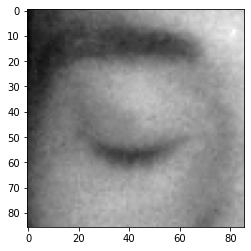

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(86, 86)

# reading all images and convert them to array for data and labels

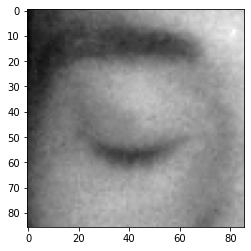

In [5]:
Datadirectory = "Test_Dataset/"
Classes= ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
        

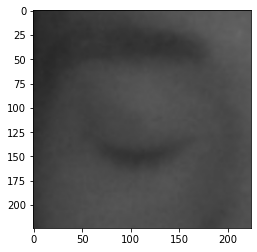

In [6]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [7]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)  ## 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

6209


In [10]:
import random

random.shuffle(training_Data)

In [11]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,3)

In [12]:
X.shape

(6209, 224, 224, 3)

In [13]:
X = X/255.0 #we are normalizing it

In [14]:
Y = np.array(y)

In [15]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

MemoryError: 

# deep learning model for training - Training Learning

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model = tf.keras.applications.mobilenet.MobileNet()

In [17]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# transfer learning

In [18]:
base_input = model.layers[0].input #input

In [19]:
base_output = model.layers[-4].output #output

In [20]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) # one node(1/0)
final_output = layers.Activation("sigmoid")(final_output)

In [21]:
new_model = keras.Model(inputs = base_input, outputs=final_output)

In [22]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# Settingfor binary classification(open/Closed)

In [23]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [24]:
new_model.fit(X,Y,epochs = 10,validation_split = 0.1) ##training

Epoch 1/10
 29/175 [===>..........................] - ETA: 9:43 - loss: 0.2250 - accuracy: 0.9375

KeyboardInterrupt: 

In [2]:
new_model.save('my_model.h5')

NameError: name 'new_model' is not defined

In [3]:
new_model = tf.keras.models.load_model('my_model.h5') #loading my previously made model

# checking for the network predictions

# OPEN EYES PREDICTION

In [26]:
img_array = cv2.imread("Test_Dataset/Open_Eyes/s0001_02066_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (224,224))

In [27]:
img_size = 224
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [28]:
X_input.shape

(1, 224, 224, 3)

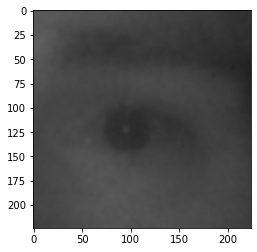

In [29]:
plt.imshow(new_array)

In [30]:
X_input = X_input/255.0

In [31]:
prediction = new_model.predict(X_input)

In [32]:
prediction #open eyes gives larger values nearer to 1, and close eyes gives near to 0

array([[0.99793494]], dtype=float32)

# CLOSED EYES PREDICTION

In [33]:
img_array = cv2.imread("Test_Dataset/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (224,224))

In [34]:
img_size = 224
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [35]:
X_input.shape

(1, 224, 224, 3)

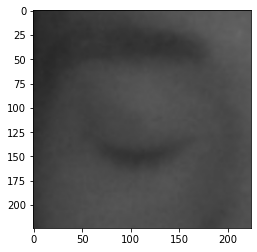

In [36]:
plt.imshow(new_array)

In [37]:
prediction = new_model.predict(X_input)

In [38]:
prediction #open eyes gives larger values nearer to 1, and close eyes gives near to 0

array([[0.04190961]], dtype=float32)

# Lets check on unknown image

In [41]:
img = cv2.imread('12.jpg')

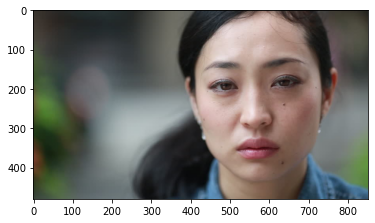

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [43]:
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [44]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [45]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [46]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [47]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x,y),(x+w, y+h), (0, 255, 0), 2)

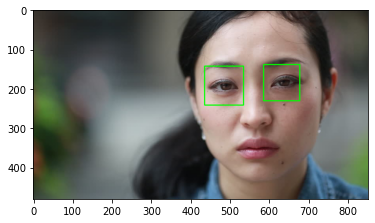

In [48]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# cropping eyes

In [49]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for(x, y, w, h) in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes are not Detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]

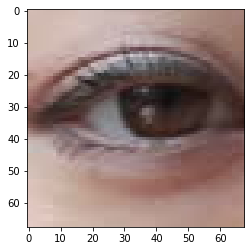

In [50]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [51]:
eyes_roi.shape

(68, 68, 3)

In [52]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0) #need fourth dimension
final_image = final_image/255.0

In [53]:
final_image.shape

(1, 224, 224, 3)

In [54]:
prediction = new_model.predict(final_image)

In [55]:
prediction

array([[0.99946886]], dtype=float32)

# Real Time Video Demo

In [56]:
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)


while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            status = "eyes not detected"
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0) #need fourth dimension
    final_image = final_image/255.0
    
    predictions = new_model.predict(final_image)
    if(predictions[0][0]>0.3):
        status = "Open eyes"
    else:
        status = "Closed eyes"
    print(predictions[0][0],"->",status)
    #print(status)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    #Draw a rectangle around faces
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0),2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #use putText() method for inserting text
    cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Drowsiness Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

eyes are not detected
0.17587146 -> Closed eyes
False
0.3795422 -> Open eyes
False
0.70921385 -> Open eyes
False
0.46602878 -> Open eyes
False
eyes are not detected
0.87008935 -> Open eyes
False
0.18021923 -> Closed eyes
False
0.39612153 -> Open eyes
False
0.3966313 -> Open eyes
False
0.27416253 -> Closed eyes
False
eyes are not detected
0.3619119 -> Open eyes
False
0.56302834 -> Open eyes
False
0.24316123 -> Closed eyes
False
0.22446778 -> Closed eyes
False
0.19390744 -> Closed eyes
False
eyes are not detected
0.21598896 -> Closed eyes
False
0.39792708 -> Open eyes
False
0.31146693 -> Open eyes
False
0.1342603 -> Closed eyes
False
0.39760557 -> Open eyes
False
0.6629917 -> Open eyes
False
0.7077026 -> Open eyes
False
0.50717664 -> Open eyes
False
0.2909325 -> Closed eyes
False
eyes are not detected
0.5162435 -> Open eyes
False
0.2774995 -> Closed eyes
False
0.7013432 -> Open eyes
False
0.64795065 -> Open eyes
False
0.6488718 -> Open eyes
False
0.27301916 -> Closed eyes
False
0.4230336

# Alarm system and timer for eyes closing

In [14]:
import winsound
frequency = 500
duration = 100
import numpy as np
import cv2
counter = 0
font = cv2.FONT_HERSHEY_SIMPLEX
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)


while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    
    #define a status bar below
    x1,h1 = 0,75
    w1=frame.shape[1]
    y1=frame.shape[0]-75
    cv2.rectangle(frame, (x1,y1), (x1 + w1, y1 + h1),(0,0,0), -1)
    
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            status = "eyes not detected"
            cv2.putText(frame,status,(x1 + int(w1/3) ,y1 + int(h1/2)+20),font,0.7,(255,0,0),2,cv2.LINE_4)
            print("eyes are not detected")
            
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0) #need fourth dimension
    final_image = final_image/255.0
    
    predictions = new_model.predict(final_image)
    
    
    if(predictions[0][0]>0.3):
        counter = 0
        status = "Open eyes"
        cv2.putText(frame,status,(x1 + int(w1/3) ,y1 + int(h1/2)),font,0.7,(0,255,0),2,cv2.LINE_4)
        cv2.putText(frame, 'Active', (x1 + 2,y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,255,0),2)
    else:
        counter = counter + 1
        status = "Closed eyes"
        cv2.putText(frame,status,(x1 + int(w1/3) ,y1 + int(h1/2)),font,0.7,(0,255,0),2,cv2.LINE_4)
        if counter>5:
            cv2.putText(frame, 'Sleep Alert!', (x1 + w1-200,y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,0,255),2)
            print("Playing the file 'alarm.wav'")
            winsound.PlaySound('alarm.wav', winsound.SND_FILENAME)    
            counter = 0
            
    print(predictions[0][0],"-->",status)
    cv2.imshow('Drowsiness Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

0.17679432 --> Closed eyes
0.079247385 --> Closed eyes
0.13304642 --> Closed eyes
0.77738047 --> Open eyes
0.8208345 --> Open eyes
0.6498579 --> Open eyes
0.9770771 --> Open eyes
0.76425636 --> Open eyes
0.092607856 --> Closed eyes
0.36102557 --> Open eyes
0.050893426 --> Closed eyes
0.6493221 --> Open eyes
0.0701845 --> Closed eyes
0.04449886 --> Closed eyes
0.078787446 --> Closed eyes
0.12027779 --> Closed eyes
0.06728625 --> Closed eyes
Playing the file 'alarm.wav'
0.09250605 --> Closed eyes
0.93988144 --> Open eyes
0.42642808 --> Open eyes
0.64692813 --> Open eyes
0.99640626 --> Open eyes
0.92613727 --> Open eyes
0.7572946 --> Open eyes
0.7113183 --> Open eyes
0.6013049 --> Open eyes
0.6550765 --> Open eyes


# Alarm system and timer for distracted driver and sleepy Eyes

In [4]:
import winsound
frequency = 500
duration = 100
import numpy as np
import cv2
counter = 0
counterno=0
font = cv2.FONT_HERSHEY_SIMPLEX
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)


while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    
    #define a status bar below
    x1,h1 = 0,75
    w1=frame.shape[1]
    y1=frame.shape[0]-75
    cv2.rectangle(frame, (x1,y1), (x1 + w1, y1 + h1),(0,0,0), -1)
    if len(faces) == 0:
        counterno = counterno + 1
        status = "Driver Distracted"
        cv2.putText(frame,status,(x1 + int(w1/3) ,y1 + int(h1/2)+20),font,0.7,(255,0,0),2,cv2.LINE_4)
        print("Driver Distracted")
        if counterno>5:
                cv2.putText(frame, 'Driver Distracted!', (x1 + w1-200,y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,0,255),2)
                print("Playing the file 'alarm2.wav'")
                winsound.PlaySound('alarm2.wav', winsound.SND_FILENAME)    
                counterno = 0
    else:
            for x,y,w,h in faces:
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = frame[y:y+h, x:x+w]
                cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
                eyess = eye_cascade.detectMultiScale(roi_gray)
                if len(eyess) == 0:
                    status = "eyes not detected"
                    cv2.putText(frame,status,(x1 + int(w1/3) ,y1 + int(h1/2)+20),font,0.7,(255,0,0),2,cv2.LINE_4)
                    print("eyes are not detected")
            
                else:
                    for (ex,ey,ew,eh) in eyess:
                        eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]
                        cv2.rectangle(frame, (x+ex,y+ey), (x+ex+ew,y+ey+eh), (0,0,255), 2)
            final_image = cv2.resize(eyes_roi, (224,224))
            final_image = np.expand_dims(final_image,axis = 0) #need fourth dimension
            final_image = final_image/255.0
    
            predictions = new_model.predict(final_image)
    
    
            if(predictions[0][0]>0.3):
                counter = 0
                status = "Open eyes"
                cv2.putText(frame,status,(x1 + int(w1/3) ,y1 + int(h1/2)),font,0.7,(0,255,0),2,cv2.LINE_4)
                cv2.putText(frame, 'Active', (x1 + 2,y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,255,0),2)
            else:
                counter = counter + 1
                status = "Closed eyes"
                cv2.putText(frame,status,(x1 + int(w1/3) ,y1 + int(h1/2)),font,0.7,(0,255,0),2,cv2.LINE_4)
                if counter>5:
                    cv2.putText(frame, 'Sleep Alert!', (x1 + w1-200,y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,0,255),2)
                    print("Playing the file 'alarm.wav'")
                    winsound.PlaySound('alarm.wav', winsound.SND_FILENAME)    
                    counter = 0
            
            print(predictions[0][0],"-->",status)
    cv2.imshow('Drowsiness Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

Driver Distracted
Driver Distracted
Driver Distracted
Driver Distracted
Driver Distracted
eyes are not detected
0.058146477 --> Closed eyes
0.07907304 --> Closed eyes
0.086710185 --> Closed eyes
0.08365744 --> Closed eyes
0.10760009 --> Closed eyes
Playing the file 'alarm.wav'
0.057442993 --> Closed eyes
0.0985364 --> Closed eyes
0.069129914 --> Closed eyes
0.094625026 --> Closed eyes
0.10308951 --> Closed eyes
0.10940507 --> Closed eyes
Playing the file 'alarm.wav'
0.111359596 --> Closed eyes
0.488264 --> Open eyes
0.5208671 --> Open eyes
0.9542607 --> Open eyes
0.7014303 --> Open eyes
0.13713437 --> Closed eyes
eyes are not detected
0.8709613 --> Open eyes
0.4647187 --> Open eyes
0.4701726 --> Open eyes
0.39040083 --> Open eyes
0.3020866 --> Open eyes
0.9003581 --> Open eyes
0.9385929 --> Open eyes
0.6295745 --> Open eyes
eyes are not detected
0.6295745 --> Open eyes
Driver Distracted
Playing the file 'alarm2.wav'
0.14343023 --> Closed eyes
0.19548985 --> Closed eyes
0.18226576 --> C